In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#Importing dataset

In [ ]:
df = pd.read_csv('/content/Facebook_Marketplace_data.csv')
print("Dataset Shape:", df.shape)
print("Dataset Columns:", df.columns)
print("Sample Data:")
print(df.head())
print(df)

Dataset Shape: (7050, 16)
Dataset Columns: Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')
Sample Data:
   status_id status_type status_published  num_reactions  num_comments  \
0          1       video   4/22/2018 6:00            529           512   
1          2       photo  4/21/2018 22:45            150             0   
2          3       video   4/21/2018 6:17            227           236   
3          4       photo   4/21/2018 2:29            111             0   
4          5       photo   4/18/2018 3:22            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0         262        432         92         3          1         1   
1           0        150          0         0          0         0   
2          57        2

In [ ]:
df = df.dropna(axis=1, how='all')
print(df.columns) #Dropping the empty columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')


<ipython-input-6-a4f5e7e6d2a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status_published'] = pd.to_datetime(df['status_published'])
<ipython-input-6-a4f5e7e6d2a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['status_published'].dt.hour


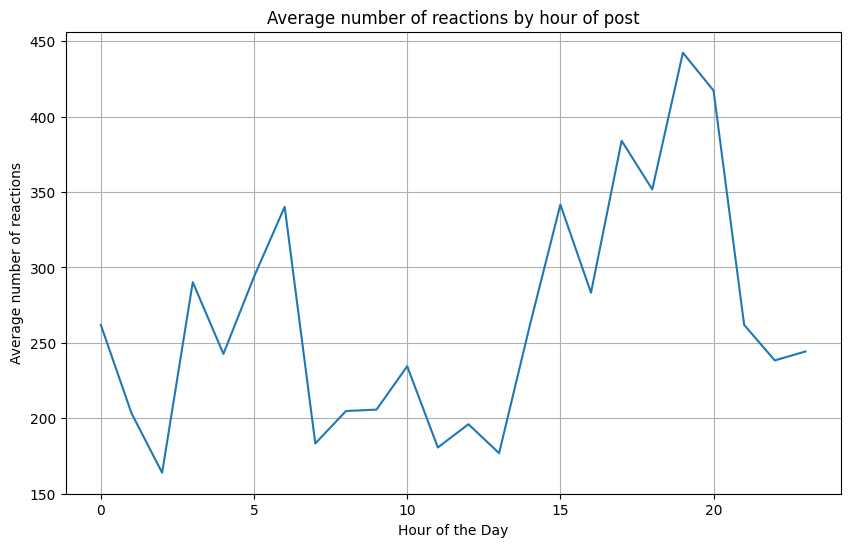

In [ ]:
#1.	How does the time of upload (`status_published`)  affects the `num_reaction`?
df['status_published'] = pd.to_datetime(df['status_published'])
df['hour'] = df['status_published'].dt.hour
hourly_reactions = df.groupby('hour')['num_reactions'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_reactions.index, y=hourly_reactions.values)
plt.title('Average number of reactions by hour of post')
plt.xlabel('Hour of the Day')
plt.ylabel('Average number of reactions')
plt.grid(True)
plt.show()


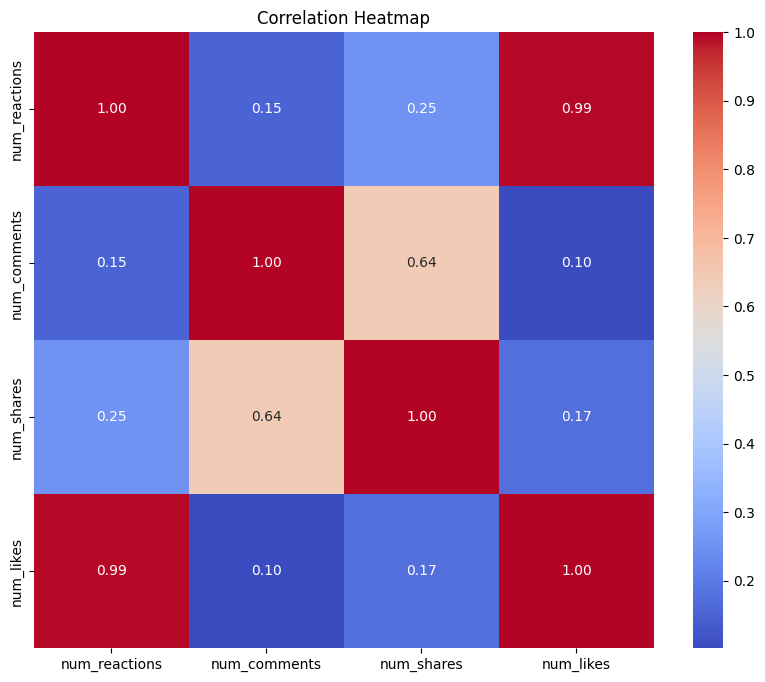

In [ ]:
#2.	Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?
correlation_matrix = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



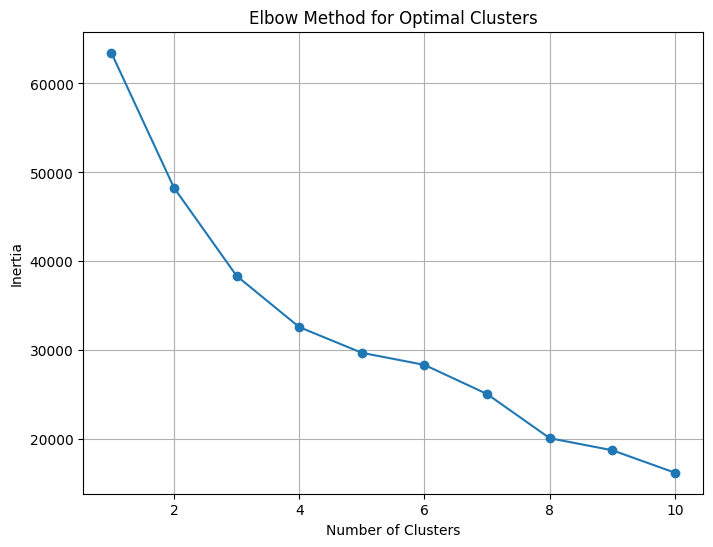

In [ ]:
#3.	Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.

features = ['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']
X = df[features]   #Standardizing the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#4.	Use the elbow method to find the optimum number of clusters.
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1,11),wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

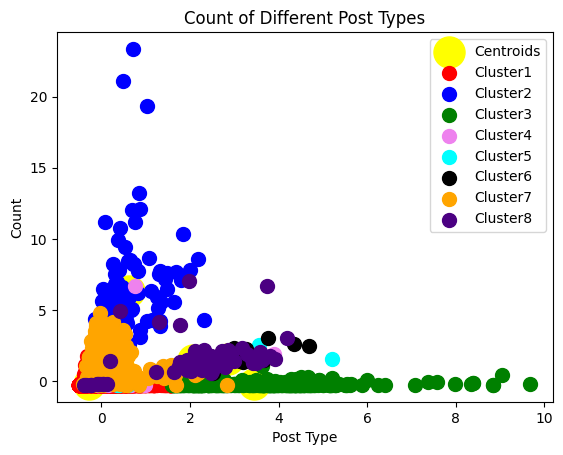

In [ ]:
# We consider 8 to be the number of clusters.
kmeans = KMeans(n_clusters=8, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=500, c='yellow',label='Centroids')
plt.scatter(X_scaled[y_kmeans == 0,0],X_scaled[y_kmeans == 0, 1],s=100, c='red',label='Cluster1')
plt.scatter(X_scaled[y_kmeans == 1,0],X_scaled[y_kmeans == 1, 1],s=100, c='blue',label='Cluster2')
plt.scatter(X_scaled[y_kmeans == 2,0],X_scaled[y_kmeans == 2, 1],s=100, c='green',label='Cluster3')
plt.scatter(X_scaled[y_kmeans == 3,0],X_scaled[y_kmeans == 3, 1],s=100, c='violet',label='Cluster4')
plt.scatter(X_scaled[y_kmeans == 4,0],X_scaled[y_kmeans == 4, 1],s=100, c='cyan',label='Cluster5')
plt.scatter(X_scaled[y_kmeans == 5,0],X_scaled[y_kmeans == 5, 1],s=100, c='black',label='Cluster6')
plt.scatter(X_scaled[y_kmeans == 6,0],X_scaled[y_kmeans == 6, 1],s=100, c='orange',label='Cluster7')
plt.scatter(X_scaled[y_kmeans == 7,0],X_scaled[y_kmeans == 7, 1],s=100, c='indigo',label='Cluster8')

plt.title('Count of Different Post Types')
plt.xlabel('Post Type')
plt.ylabel('Count')
plt.legend()
plt.show()

Count of Different Post Types:
status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


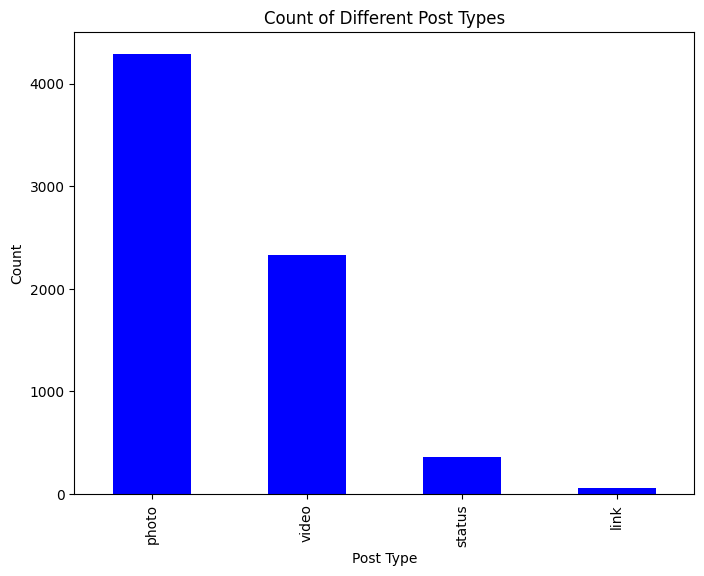

In [ ]:
#5.	What is the count of different types of posts in the dataset?
posttype_count = df['status_type'].value_counts()
print("Count of Different Post Types:")
print(posttype_count)

posttype_count.plot(kind='bar',color='blue',figsize=(8,6))
plt.title('Count of Different Post Types')
plt.xlabel('Post Type')
plt.ylabel('Count')
plt.show()


In [ ]:
#6.	What is the average value of num_reaction, num_comments, num_shares for each post type?

average_engagement = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()
print("Average Engagement Metrics by Post Type:")
print(average_engagement)

Average Engagement Metrics by Post Type:
             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
